In [1]:
import sklearn
import pandas as pd
import os
import json
from matplotlib import pyplot as plt
import seaborn as sns
import os
import random
import scipy.stats as stats

In [2]:
import warnings
warnings. filterwarnings('ignore')

In [3]:
os.chdir('C:/Users/tsarcevic/PycharmProjects/fingerprinting-toolbox')
from datasets import Adult, Dataset
from scheme import Universal

In [5]:
sns.set_style("whitegrid")

In [7]:
original_data = Adult()

In [8]:
fp_dataset = Dataset(path='evaluation/fingerprinted_data/adult/adult_l64_g6_x4_4370315727_4.csv',
                                  target_attribute='income')

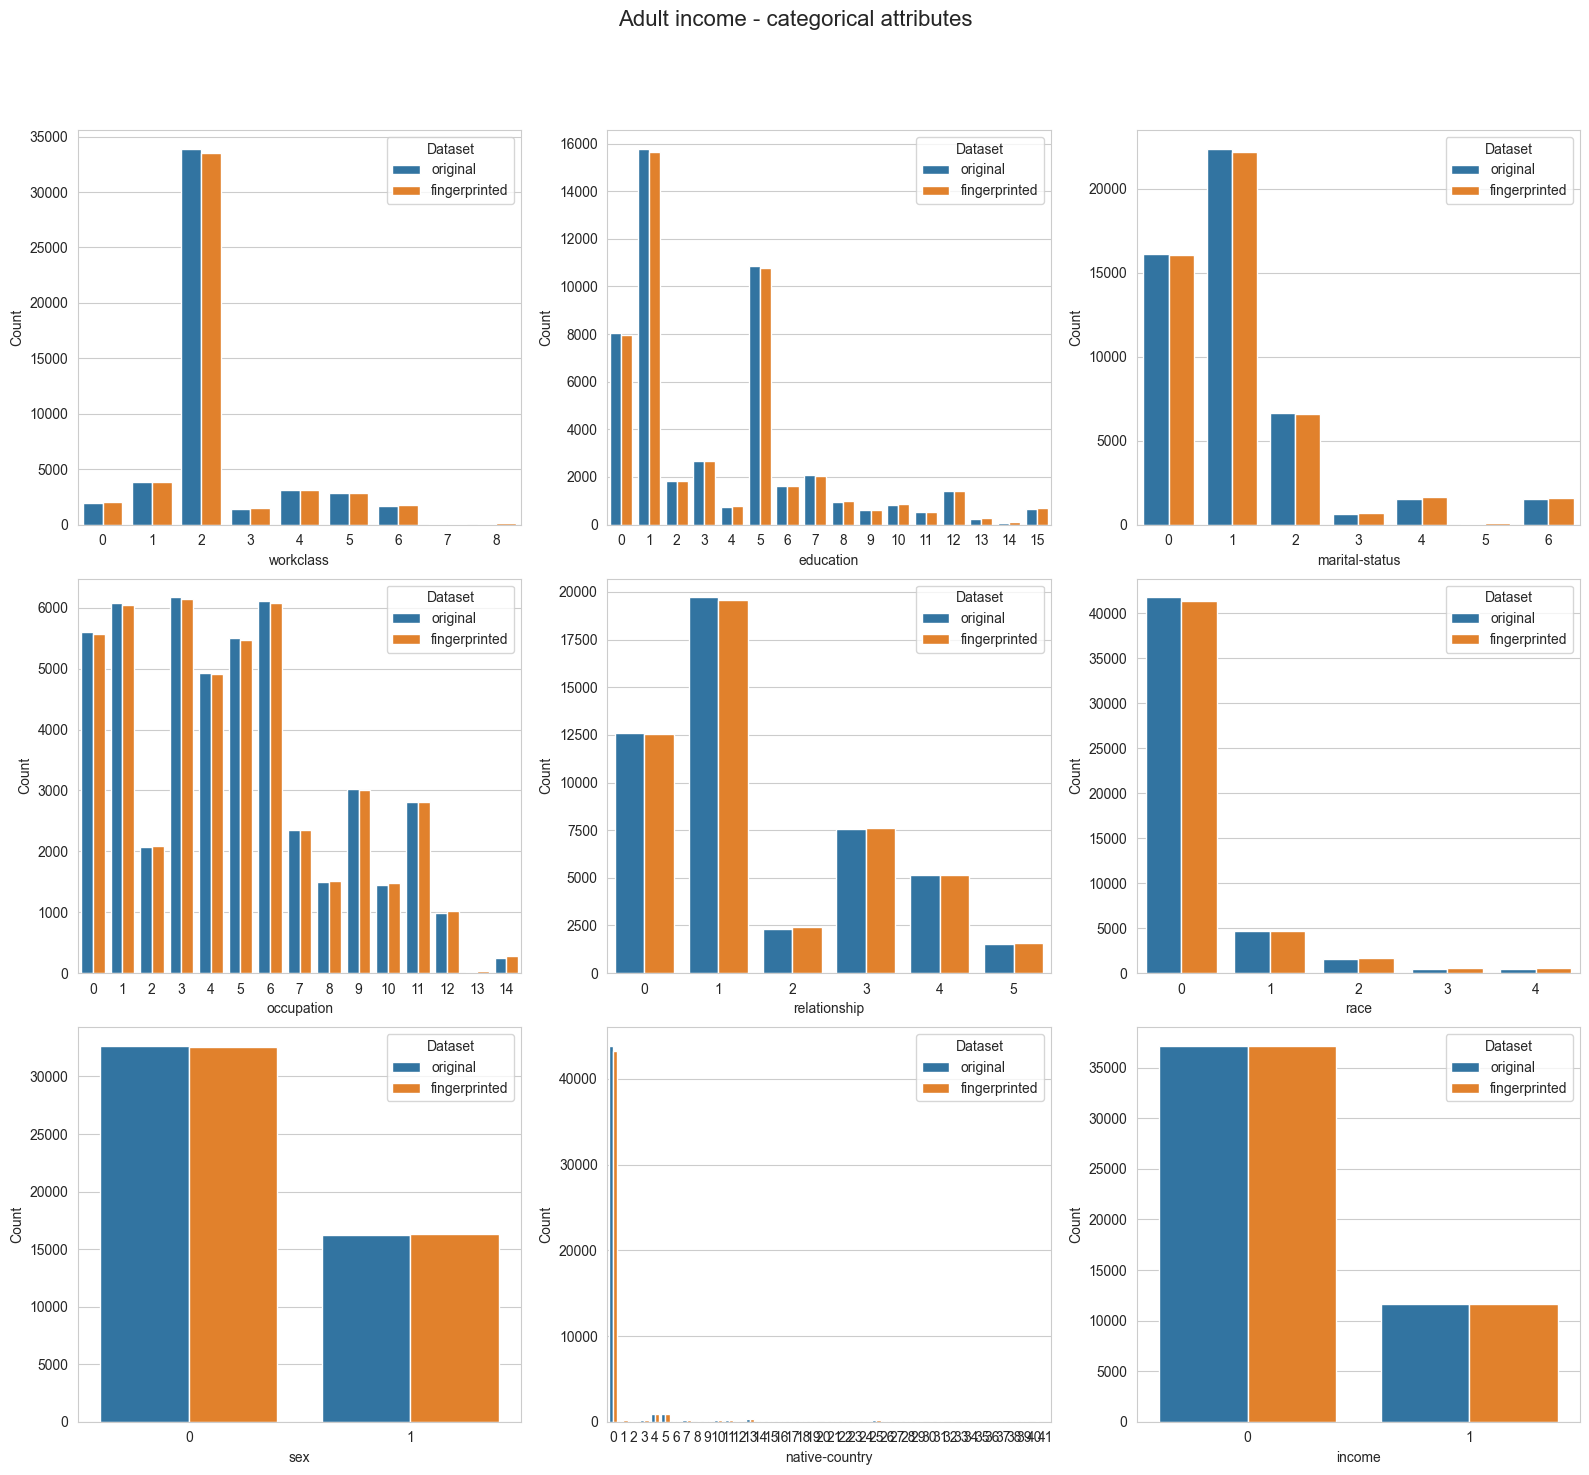

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 15))
fig.suptitle('Adult income - categorical attributes', fontsize=16)

axes = axes.flatten()

original_data.dataframe['dataset'] = ['original' for i in range(len(original_data.dataframe))]
fp_dataset.dataframe['dataset'] = ['fingerprinted' for i in range(len(fp_dataset.dataframe))]
for i, attribute in enumerate(original_data.categorical_attributes): # plot 12 out of 13 because... 13
    ax = axes[i]
    sns.countplot(data=pd.concat([original_data.dataframe, 
                                  fp_dataset.dataframe], 
                                 ignore_index=True),
                  x=attribute, hue='dataset', ax=axes[i])
    #ax.set_title(f'Distribution of {attribute}')
    ax.legend(title='Dataset', labels=['original', 'fingerprinted'])
    ax.set_xlabel(attribute)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticks(), rotation=0)
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.savefig('evaluation/figures/utility_distributions_adult.svg')
plt.savefig('evaluation/figures/utility_distributions_adult.png')